# Inversion and Optimisation <a class="tocSkip">

## Lecture 2a <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si
from mpl_toolkits.mplot3d import Axes3D

# Homework

## Homework - Transformation of the unit circle - the case of a symmetric matrix

If you recreate the transformation of the unit circle plot from the lecture in the case of a symmetric matrix, what do you notice about the "special directions", i.e. the eigenvectors?

In my solution I considered the case

$$ A = 
\left(
  \begin{array}{rr}
    3.6 & 1.6 \\
    1.6 & 3.2  
  \end{array}
\right)
$$

as it gives a nice ellipse.

### Solution

Just use the code from the lecture, but try some symmetric matrices:

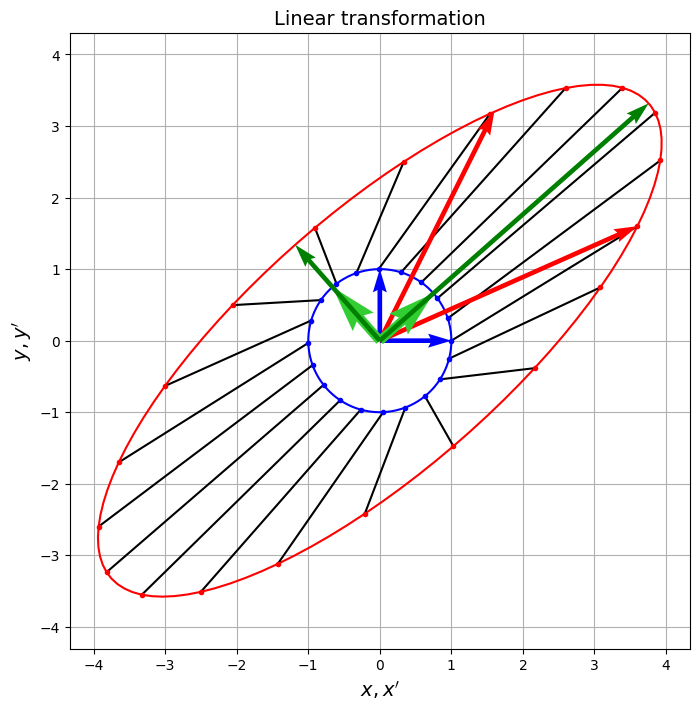

In [2]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])


# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# an Symmetric example matrix
A = np.array([[3.6,1.6],[1.6,3.2]])

xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

lam, vecs = sl.eig(A)

# plot the unit eigenvectors
ax1.quiver(vecs[0,0], vecs[1,0], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)
ax1.quiver(vecs[0,1], vecs[1,1], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)

# plot the scaled eigenvectors
ax1.quiver(np.real(lam[0])*vecs[0,0], np.real(lam[0])*vecs[1,0], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)
ax1.quiver(np.real(lam[1])*vecs[0,1], np.real(lam[1])*vecs[1,1], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)

ax1.axis('equal')

# plot a subsect of vectors and how they transform
for i, angle in enumerate(theta[::5]):  # don't use all the angles
    #ax1.plot([0,points[0,5*i]],[0,points[1,5*i]],'k')
    ax1.plot([points[0,5*i],pointsp[0,5*i]],[points[1,5*i],pointsp[1,5*i]],'k')
    ax1.plot([points[0,5*i]],[points[1,5*i]],'b.')
    ax1.plot([pointsp[0,5*i]],[pointsp[1,5*i]],'r.')


What we should notice is that the *special* directions given by the green arrows are orthogonal to one another and correspond with the [semi-major and semi-minor axes](https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes) of the ellipse.

## Homework - Transformation using the diagonalisation matrices in turn - a symmetric example

Repeat the steps 

\begin{align*}
A\boldsymbol{x} = P \Lambda P^{-1}\boldsymbol{x} = P \; (\Lambda\;  (P^{-1}\boldsymbol{x}))
\end{align*}

geometrically starting for a unit circle using the symmetric matrix example from the previous question.

Confirm what was said in the lecture that the $P$ and thus $P^{-1}$ being orthogonal matrices means that they just correspond to simple rotations.

NB. you can just use `sl.eig` to find the eigenvalues and eigenvectors.

### Solution

In [3]:

A = np.array([[3.6,1.6],[1.6,3.2]])

# construct P and Lambda

# start with SciPy
lam, vecs = sl.eig(A)
# take the real components and turn the eigenvalue vector into a diag matrix
Lambda = np.diag(np.real(lam))
P = np.real(vecs)

print(Lambda)
print(P)
print('A =  P@Lambda@sl.inv(P) :', np.allclose(A, P@Lambda@sl.inv(P)))

[[5.01245155 0.        ]
 [0.         1.78754845]]
[[ 0.74967818 -0.66180256]
 [ 0.66180256  0.74967818]]
A =  P@Lambda@sl.inv(P) : True


First let's plot what the first multiplication

$$P^{-1}\boldsymbol{x}$$

does to the unit circle

(-1.0999768230992064,
 1.0999988963380574,
 -1.0998657077857161,
 1.099949054674786)

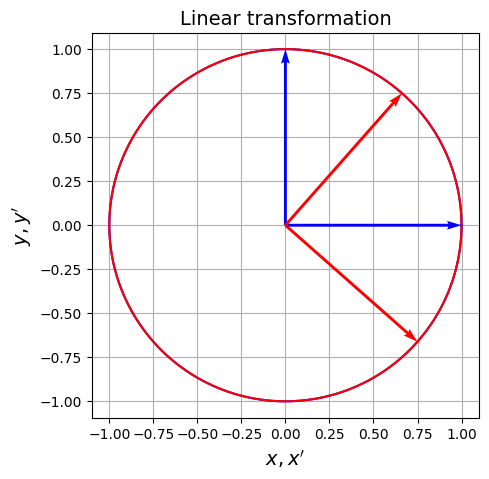

In [4]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)


# Use our P^{-1} matrix

xp = sl.inv(P)@x
yp = sl.inv(P)@y
pointsp = sl.inv(P)@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal')

So this rotates our blue circle and stretches it to yield the ellipse with semi-major and minor axis made up of the columns of $A$ - the blue unit vectors transform to the red vectors.

Now let's pre-multiply by $\Lambda$

(-5.5135016577055485,
 5.512034822189153,
 -1.9658239563658104,
 1.966200833605325)

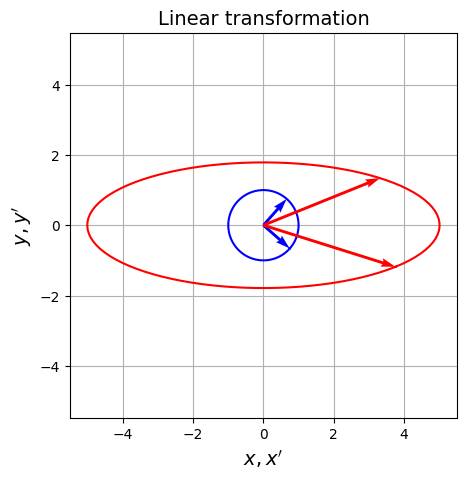

In [5]:
# before running this cell please make sure you run the previous

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# Use the points and the x,y from the previous cell:
x = xp
y = yp
points = pointsp

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# Now use our Lambda matrix

xp = Lambda@x
yp = Lambda@y
pointsp = Lambda@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal')

The blue here was the outcome of the first operation, the red the result.

So pre-multiplication by the diagonal $\Lambda$ just stretches in the $x$ and $y$ directions.

Finally we need to pre-multiply by $P$

(-5.5135016577055485,
 5.512034822189153,
 -3.9353852149300175,
 3.9339830396970594)

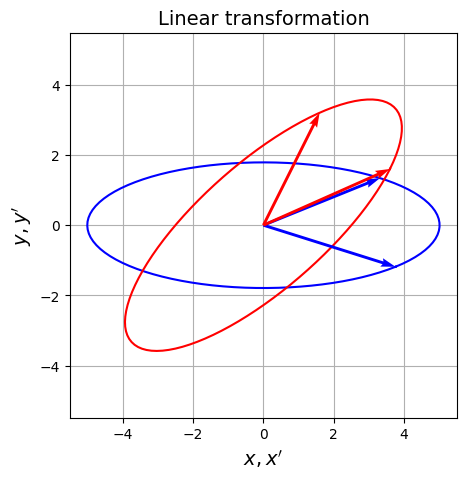

In [6]:
# before running this cell please make sure you run the previous

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# Use the points and the x,y from the previous cell:
x = xp
y = yp
points = pointsp

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# Now use our P matrix

xp = P@x
yp = P@y
pointsp = P@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal')

Again the blue was the output from the previous operations, and red the output from the final pre-multiplication.

So again as the matrix is orthogonal the final multiplication simply rotates our previous result.

Note that (as long as you run the three cells in order!) the red result here agrees with the transformation under the matrix $A$.

## Homework - SVD example

Consider the matrix

$$A = \begin{pmatrix} 
3 & 1 & 9 & 4 \\
2 & 1 & 7 & 3 \\
5 & 2 & 16 & 7 
\end{pmatrix}$$

Check that 

$$A = U\Sigma V^{T}$$

using the definitions of the matrices in terms of eigenvalues and eigenvectors of $AA^T$ and $A^TA$.

Note that we need to choose the signs of our left and right singular vectors consistently. When we compute eigenvectors, the sign of the vector is arbitrary. We can always multiply an eigenvector by an arbitrary scalar, and it remains an eigenvector. Even if we normalize the eigenvectors, we can still multiply by $-1$ because it doesn't change the norm. In the SVD decomposition the sign of the columns in $V$ and $U$ however does matter. We are only allowed to multiply a column of $V$ with $-1$ if we also multiply the same column of $U$ with $-1$ (corresponding to the same singular value). So when you compute the eigenvectors (you can use `scipy.linalg.eig` for this) you may have to multiply some columns with -1.

You can check the signs of your columns of $U$ and $V$ against the SciPy solution obtained from `scipy.linalg.svd`, which will have chosen the signs consistently, and if needed flip the signs of he appropriate columns.

### Solution

In [7]:
# This is the scipy solution

A = np.array([
    [3, 1, 9, 4],
    [2, 1, 7, 3],
    [5, 2, 16,7]])


UU, SS, VVT = sl.svd(A)
SSS = np.zeros_like(A,dtype='float')
# the following just places the SS vector on singular vectors into the 
# right locations of the matrix SSS
SSS[:min(A.shape[0],A.shape[1]),:min(A.shape[0],A.shape[1])] = np.diag(SS)

print('\nSS')
pprint(SS)

print('\nUU')
pprint(UU)

print('\nVV')
pprint(VVT.T)

print('\nSSS')
pprint(SSS)

print('\nresult')
pprint(UU @ SSS @ VVT)


SS
array([2.24476901e+01, 3.18136450e-01, 7.49818115e-16])

UU
array([[-0.46070919, -0.67410215, -0.57735027],
       [-0.35343499,  0.73603694, -0.57735027],
       [-0.81414418,  0.06193479,  0.57735027]])

VV
array([[-0.27440322, -0.75614925,  0.43056292,  0.40933696],
       [-0.10880552,  0.58403984,  0.22103348,  0.77343586],
       [-0.875223  ,  0.23982101,  0.20952944, -0.36409889],
       [-0.38320874, -0.17210941, -0.84962179,  0.31886082]])

SSS
array([[2.24476901e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.18136450e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.49818115e-16, 0.00000000e+00]])

result
array([[ 3.,  1.,  9.,  4.],
       [ 2.,  1.,  7.,  3.],
       [ 5.,  2., 16.,  7.]])


In [8]:
# This is my first attempt using the eigenvalues/vectors of A @ A.T and A.T @ A

A = np.array([
    [3, 1, 9, 4],
    [2, 1, 7, 3],
    [5, 2, 16,7]])

U = sl.eig(A @ A.T)[1]
V = sl.eig(A.T @ A)[1]

eigs1 = np.real(sl.eig(A @ A.T)[0])
eigs2 = np.real(sl.eig(A.T @ A)[0])

# print out the two sets of e-vals - the non-zero values should be the same
print('eigs 1 = ', eigs1)
print('eigs 2 = ', eigs2)

# sigma needs to be the same size as A:
sigma = np.zeros_like(A, dtype='float')
# use dtype if A ints
# or sigma = np.zeros((A.shape[0], A.shape[1]))
# add the 3 (in this case) e'vals to sigma's 'diagonal')
sigma[:min(A.shape[0],A.shape[1]),:min(A.shape[0],A.shape[1])] = np.diag(np.sqrt(eigs1))
sigma[2,2]=0

print('\nsigma')
pprint(sigma)

print('\nU')
pprint(U)

print('\nV')
pprint(V)

print('\nresult')
pprint(U @ (sigma @ V.T))


eigs 1 =  [5.03898789e+02 1.01210801e-01 4.07105143e-14]
eigs 2 =  [ 5.03898789e+02  1.01210801e-01  2.31552279e-15 -6.10496405e-15]

sigma
array([[22.44769006,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.31813645,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

U
array([[-0.46070919, -0.67410215, -0.57735027],
       [-0.35343499,  0.73603694, -0.57735027],
       [-0.81414418,  0.06193479,  0.57735027]])

V
array([[-0.27440322,  0.75614925,  0.50711874, -0.22016432],
       [-0.10880552, -0.58403984,  0.37897554,  0.12232094],
       [-0.875223  , -0.23982101,  0.12814321, -0.34248526],
       [-0.38320874,  0.17210941, -0.76340516,  0.90513485]])

result
array([[ 2.67567781,  1.25050224,  9.10286233,  3.92618005],
       [ 2.35412009,  0.72648225,  6.88768694,  3.08060234],
       [ 5.0297979 ,  1.97698449, 15.99054927,  7.00678239]])


As you can see above, we get the wrong answer, and don't recover the original matrix when multiplying $U\Sigma V^T$. Comparison with the SciPy solution tells us that this is because the second column of $V$ has the wrong sign (comparing the output of `V` and `VV`). Eigenvectors can always be multiplied by an arbitrary scalar and still be an eigenvector. Even when eigenvectors are normalized (so their length is fixed at one), which is the case here, we can still multiply by -1. However in the columns of $U$ and $V$ choosing the right sign is important. Only with a consistent sign choice in the columns of U and V do we recover the original matrix from the decomposition $U\Sigma V^T$.

***NOTE***: the differences I observe here when I ran the code, might not be the same on your computer. You may find that some other column(s) need changing a sign before you get the correct result. In your output compare both `UU` with `U` and `VV` with `V`.

You will also find that the last two columns of $V$ (`VV` vs. `V`) are totally different! This is because these are both associated with a zero eigenvalues: $A^TA$ is a 4x4 matrix but has the same rank as A, which is 2 - and thus the dimension of the nullspace is $4-2=2$ as well. Thus if we ask for the eigenvectors associated with the zero eigenvalue (from `sl.eig`), we may just get two arbitrary linearly independent eigenvectors in that space, and these are not necessarily the same as those returned in the SVD decomposition of `sl.svd`. Luckily these zero eigenvector do not matter: they get multiplied with the 2 last columns of $\Sigma$ which are zero. In fact as we have seen in the lecture for the reduced form of the SVD, we can even leave these columns out completely if leave out both the last 2 columns of $V$ and $\Sigma$.

So in my case all I have to do is change the sign of the second column of $V$:

In [9]:
V[:,1] = -V[:,1]
pprint(U @ (sigma @ V.T))

array([[ 3.,  1.,  9.,  4.],
       [ 2.,  1.,  7.,  3.],
       [ 5.,  2., 16.,  7.]])


## Homework - Transformation of a non-square matrix via the SVD decomposition

Consider the following matrix as an example of an over-determined problem

$$
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  \\
    -3 & -10 
  \end{pmatrix}
$$

This matrix maps $\mathbb{R}^2$ into $\mathbb{R}^3$.

As was done above for a square $2\times 2$ case, visualise each three multiplications by the matrices making up the SVD acting in the unit circle

### Solution

First let's compute the SVD matrices

In [10]:
A = np.array([[2, 3], [1, -4], [-3, -10]])

# Form the SVD
UU, SS, VVT = sl.svd(A)
SSS = np.zeros_like(A, dtype='float')
# place the entries of SS into a matrix of the correct size
SSS[:min(A.shape[0],A.shape[1]),:min(A.shape[0],A.shape[1])] = np.diag(SS)
print('SSS = ',SSS)
pprint(UU @ SSS @ VVT)
print('Our SVD is equal to A: ',np.allclose(A, UU @ SSS @ VVT))

SSS =  [[11.55700743  0.        ]
 [ 0.          2.33143288]
 [ 0.          0.        ]]
array([[  2.,   3.],
       [  1.,  -4.],
       [ -3., -10.]])
Our SVD is equal to A:  True


Let's do the first multiplication by $V^T$

(-1.0999644961718074,
 1.0999983093415147,
 -1.0998663736467913,
 1.0999630377573677)

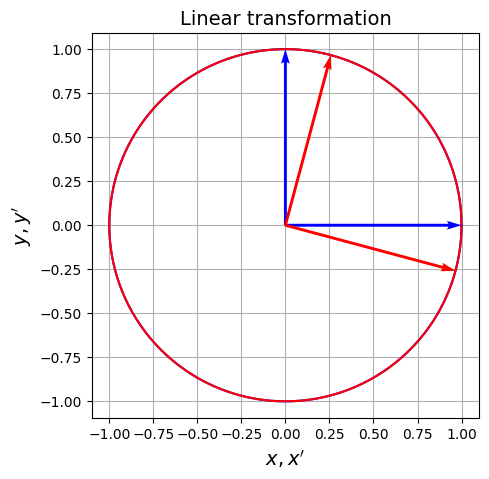

In [11]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)


# Use our VVT matrix

xp = VVT@x
yp = VVT@y
pointsp = VVT@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal')

Now the $\Sigma$ multiplication - remembering that this is a $3\times 2$ and so we need to plot the result in 3D space!

(-10.0, 10.0)

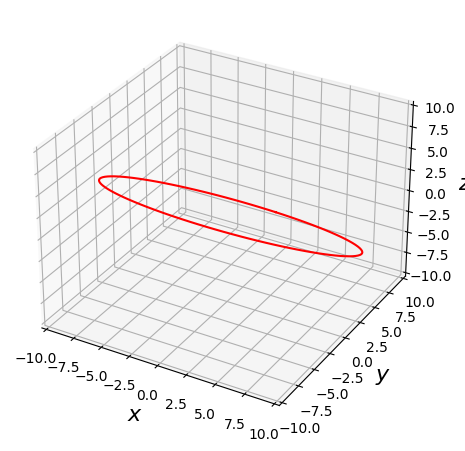

In [12]:
# run the above cell before running or re-running this one

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)

# copy the transformed circle from above which lives in 2D
points = pointsp

# transform under multiplication by Sigma which maps to 3D
pointsp = SSS@points

# plot the transformed points
ax1.plot(pointsp[0,:], pointsp[1,:], pointsp[2,:], color='red')

# set the axis limits to emphasise the stretching - axis('equal') doesn't work in 3D
ax1.set_xlim3d(-10, 10)
ax1.set_ylim3d(-10, 10)
ax1.set_zlim3d(-10, 10)

Although it's hard to tell from the plot, the $z$ values are all zero here.

Finally multiply through by $U$

(-10.0, 10.0)

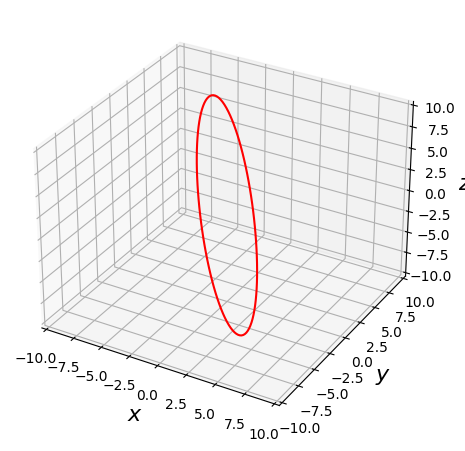

In [13]:
# run the above cell before running or re-running this one

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)

# copy the transformed points from previous cell
points = pointsp

# transform under multiplication by U which rotates in  3D
pointsp = UU@points

# plot the transformed points
ax1.plot(pointsp[0,:], pointsp[1,:], pointsp[2,:], color='red')

# set the axis limits to emphasise the stretching - axis('equal') doesn't work in 3D
ax1.set_xlim3d(-10, 10)
ax1.set_ylim3d(-10, 10)
ax1.set_zlim3d(-10, 10)

We have an ellipse that is 2D (lies on a 2D plane) but is embedded within 3D, and not aligned with any of the axes (necessarily).

## Homework - When does the SVD agree with the eigendecomposition?

Consider a square matrix - check whether the SVD and the eigendecompositions agree. 

Compare the cases of a symmetric matrix and a non-symmetrix matrix.

### Solution

In [14]:
# first the eigendecompositon of a symmetric matrix
A = np.array([[3., 1.], [1.,3.]])
lam, vecs = sl.eig(A)
print('\nlam = ')
pprint(lam)
print('\nvecs = ')
pprint(vecs)
# construct a Lambda matrix from the eigenvalues
Lambda = np.diag(np.real(lam))
print('\nLambda = ')
pprint(Lambda)
print('\nCheck our eigendecomposition works = ')
print('A =  vecs@(Lambda@sl.inv(vecs)) :', np.allclose(A, vecs@(Lambda@sl.inv(vecs))))
# and as vecs should be orthogonal for a symmetric matrix
print('\nCheck our eigendecomposition works using a transpose rather than inverse = ')
print('A =  vecs@(Lambda@(vecs.T)) :', np.allclose(A, vecs@(Lambda@(vecs.T))))


lam = 
array([4.+0.j, 2.+0.j])

vecs = 
array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Lambda = 
array([[4., 0.],
       [0., 2.]])

Check our eigendecomposition works = 
A =  vecs@(Lambda@sl.inv(vecs)) : True

Check our eigendecomposition works using a transpose rather than inverse = 
A =  vecs@(Lambda@(vecs.T)) : True


In [15]:
# now a non-symmetric matrix
A = np.array([[2.2,0.3],[1.7,2.5]])
lam, vecs = sl.eig(A)
print('\nlam = ')
pprint(lam)
print('\nvecs = ')
pprint(vecs)
# construct a Lambda matrix from the eigenvalues
Lambda = np.diag(np.real(lam))
print('\nLambda = ')
pprint(Lambda)
print('\nCheck our eigendecomposition works = ')
print('A =  vecs@(Lambda@sl.inv(vecs)) :', np.allclose(A, vecs@(Lambda@sl.inv(vecs))))
# and as vecs should be orthogonal for a symmetric matrix
print('\nCheck our eigendecomposition works using a transpose rather than inverse = ')
print('A =  vecs@(Lambda@(vecs.T)) :', np.allclose(A, vecs@(Lambda@(vecs.T))))


lam = 
array([1.62027402+0.j, 3.07972598+0.j])

vecs = 
array([[-0.45959422, -0.32276397],
       [ 0.88812902, -0.94647949]])

Lambda = 
array([[1.62027402, 0.        ],
       [0.        , 3.07972598]])

Check our eigendecomposition works = 
A =  vecs@(Lambda@sl.inv(vecs)) : True

Check our eigendecomposition works using a transpose rather than inverse = 
A =  vecs@(Lambda@(vecs.T)) : False


So in this case, as long as we take the inverse (rather than the transpose), the eigen-decomposition works.

Now let's see what SVD does for these two matrices

In [16]:
# repeat the symmetric case
A = np.array([[3., 1.], [1.,3.]])

# Form the SVD
UU, SS, VVT = sl.svd(A)
SSS = np.zeros_like(A, dtype='float')
# place the entries of SS into a matrix of the correct size
SSS[:min(A.shape[0],A.shape[1]),:min(A.shape[0],A.shape[1])] = np.diag(SS)

print('\nU = ')
pprint(UU)
print('\nS = ')
pprint(SSS)
print('\nV = ')
pprint(VVT.T)
print('\nOur SVD is equal to A: ',np.allclose(A, UU @ SSS @ VVT))


U = 
array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

S = 
array([[4., 0.],
       [0., 2.]])

V = 
array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

Our SVD is equal to A:  True


So notice that subject to minus signs (as eigenvectors are only defined upto an arbitrary scaling, so even if normalised they're only defined up to a $\pm 1$ factor) this is equivalent to the above eigendecomposition, i.e. the SVD has recovered the eigenvalues and eigenvectors of $A$ as the singular values and both the left and the right singular vectors.

In [17]:
# repeat the nonsymmetric case
A = np.array([[2.2,0.3],[1.7,2.5]])

# Form the SVD
UU, SS, VVT = sl.svd(A)
SSS = np.zeros_like(A, dtype='float')
# place the entries of SS into a matrix of the correct size
SSS[:min(A.shape[0],A.shape[1]),:min(A.shape[0],A.shape[1])] = np.diag(SS)

print('\nU = ')
pprint(UU)
print('\nS = ')
pprint(SSS)
print('\nV = ')
pprint(VVT.T)
print('\nOur SVD is equal to A: ',np.allclose(A, UU @ SSS @ VVT))

print('Check for othogonality of U and V')
print(UU@UU.T)
print(UU.T@UU)
print(VVT@VVT.T)
print(VVT.T@VVT)


U = 
array([[-0.53643008, -0.84394477],
       [-0.84394477,  0.53643008]])

S = 
array([[3.46322739, 0.        ],
       [0.        , 1.44085255]])

V = 
array([[-0.75503338, -0.65568635],
       [-0.65568635,  0.75503338]])

Our SVD is equal to A:  True
Check for othogonality of U and V
[[1.00000000e+00 2.39650772e-17]
 [2.39650772e-17 1.00000000e+00]]
[[1.00000000e+00 2.39650772e-17]
 [2.39650772e-17 1.00000000e+00]]
[[ 1.00000000e+00 -2.33492772e-17]
 [-2.33492772e-17  1.00000000e+00]]
[[ 1.00000000e+00 -2.33492772e-17]
 [-2.33492772e-17  1.00000000e+00]]


So now we have an SVD, but this is not made up of the eigenvalues and eigenvectors of $A$. So in the non-symmetric case the SVD is a different decomposition to the eigendecomposition. The fact that $U$ and $V$ are orhtogonal gives us a means to interpret multiplication by $A$ via a rotation and scaling and then a different rotation.

## Homework - A simple mixed determined solution [again!]

In the lecture and above we considered the problem

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 2 & 2 \\
0 & 3 & 3
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}
=
\begin{pmatrix}
1\\
2\\
2\\
3
\end{pmatrix}
$$

and came up with the solution

$$\boldsymbol{x} = \left(\frac{3}{2} \;\; \frac{1}{2} \;\; \frac{1}{2} \right)^T$$

both by considering the over and under components separately (as was possible here), and by use of the `np.linalg.pinv` function.

Solve this problem again but this time use the SVD you obtain from `sl.svd`.

### Solution

In [18]:
A = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [0, 2, 2],
    [0, 3, 3]])

b = np.array([1, 2, 2, 3])

U, S, VT = sl.svd(A,full_matrices=False)
pprint(np.allclose(A, U @ np.diag(S) @ VT))

pprint(S)
# note that there are only two non-zero entries, so p=2
p=2
# form the compact SVD
Sp = S[:p]
# and form the corresponding diagonal matrix
SSp = np.diag(Sp)
# pull out first p columns to find the compact form and U and V
Up = U[:,:p]
Vp = VT.T[:,:p]

# check our compact SVD
pprint(np.allclose(A, Up @ SSp @ Vp.T))

# could just invert the diagonal entries in SSp of course, but let's be lazy and use sl.inv
invAgen = Vp @ sl.inv(SSp) @ Up.T

# note that numpy as a pseudoinverse function - check our result against this:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html
pprint(np.allclose(invAgen, np.linalg.pinv(A)))

x = invAgen @ b

pprint(x)

True
array([5.09901951e+00, 1.41421356e+00, 4.44089210e-16])
True
True
array([1.5, 0.5, 0.5])


<div class="optional">

## Homework - Using the SVD in image processing (data compression) [optional]

Below I give an example of how we can use the SVD concept, and how it can be used in the "low rank" approximation of a matrix (here an image).

Read through my solution and try it out on your own image.

</div>

### Solution

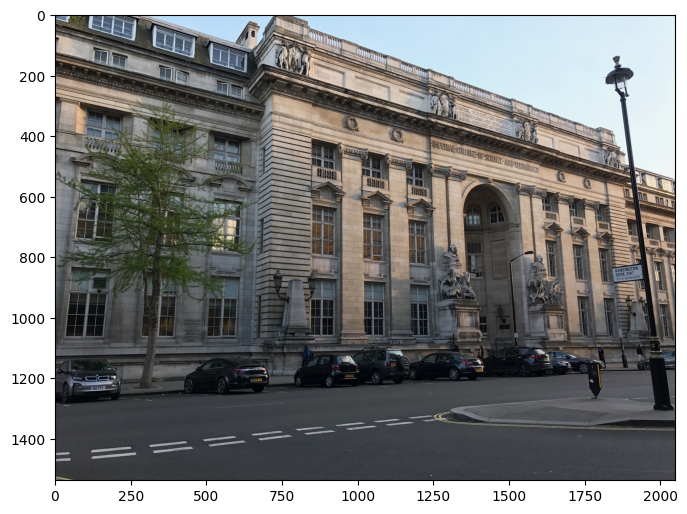

In [19]:
# PIL = Python Imaging Library
from PIL import Image
img_colour = Image.open('./figures/Imperial_College_Royal_School_of_Mines.jpg')
# convert to grey scale
img_grey = img_colour.convert('LA')
# what does LA mean? ... https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(111)
ax1.imshow(img_colour)

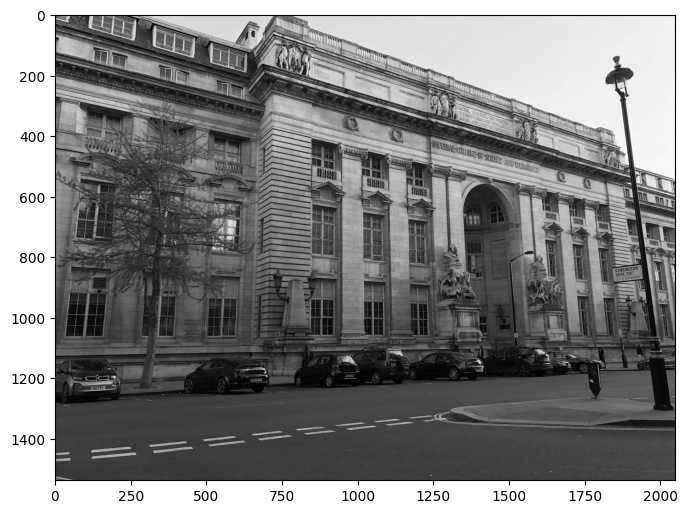

In [20]:
# as we converted to grey scale, we can represent 
# the image via a matrix with entries representing 
# pixels and the corresponding value representing
# a shade of grey between black and white

# use getdata, first band - https://www.geeksforgeeks.org/python-pil-image-getdata/
img_mat = np.array(img_grey.getdata(band=0), float)
# turn into matrix of the correct shape
img_mat.shape = (img_grey.size[1], img_grey.size[0])

fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(111)
# plot using a gray colormap
ax1.imshow(img_mat, cmap='gray');

In [21]:
# find the SVD
U, sigma, VT = np.linalg.svd(img_mat)
print('np.shape(U):', np.shape(U))
print('np.shape(sigma):', np.shape(sigma))
print('np.shape(VT):', np.shape(VT))
# asterisk to unpack the list of sigmas for nicer printing with the use of sep
print('\nFirst 5 singular values:', *list(sigma[:5]), sep='\n')
print('\nLast 5 singular values:', *list(sigma[-5:]), sep='\n')

np.shape(U): (1537, 1537)
np.shape(sigma): (1537,)
np.shape(VT): (2049, 2049)

First 5 singular values:
199880.40740129957
27858.932830895075
23722.197905424793
19130.263158802227
17003.38033366788

Last 5 singular values:
14.462556196781302
13.921842775514198
13.435164532726457
13.152103811623624
12.488683732618973


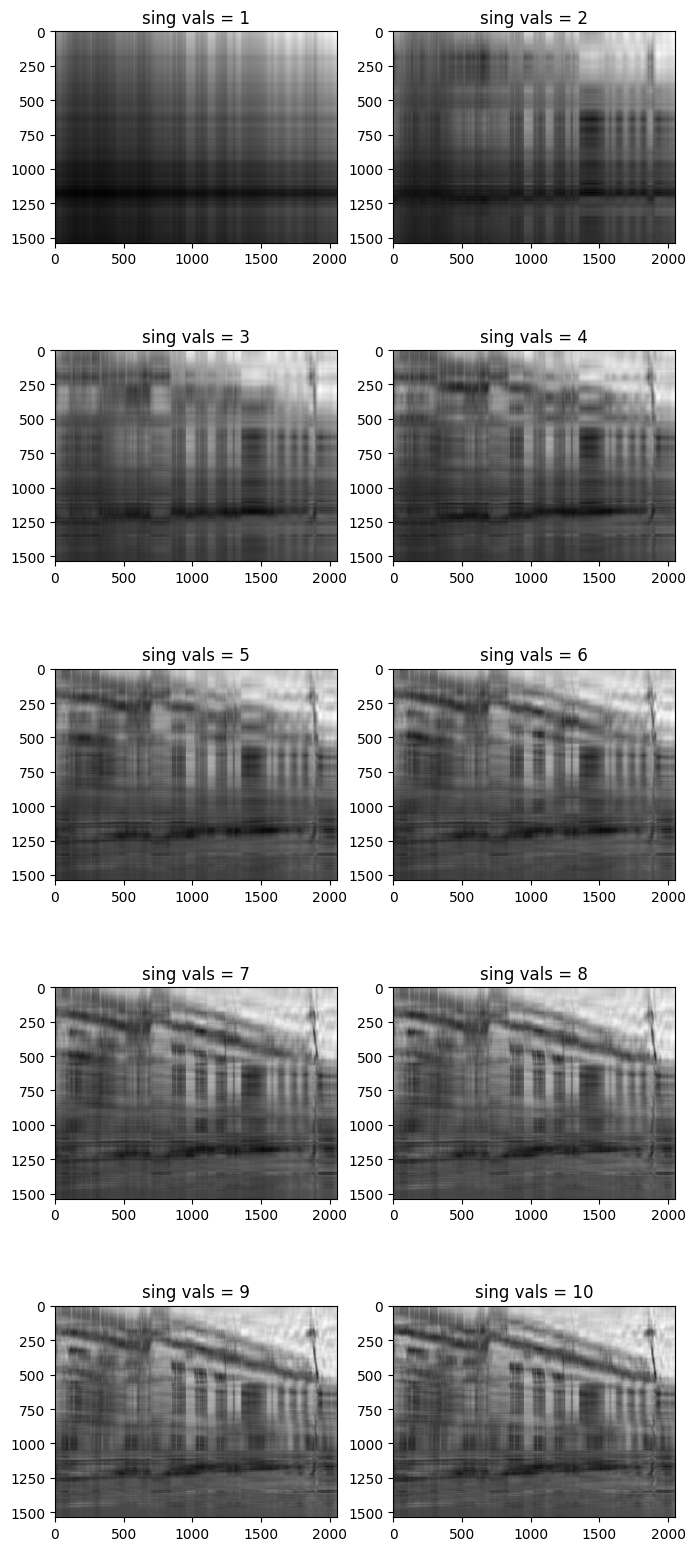

In [22]:
fig = plt.figure(figsize=(8, 20))
for i in range(1,11):
    # restrict the number of singular values considered
    sigma_r = sigma[:i]
    U_r = U[:,:i]
    VT_r = VT[:i,:]
    # reconstruct the image
    img_r = U_r@np.diag(sigma_r)@VT_r
    ax1 = fig.add_subplot(5, 2, i)
    ax1.imshow(img_r, cmap='gray')
    ax1.set_title('sing vals = %i' %i)

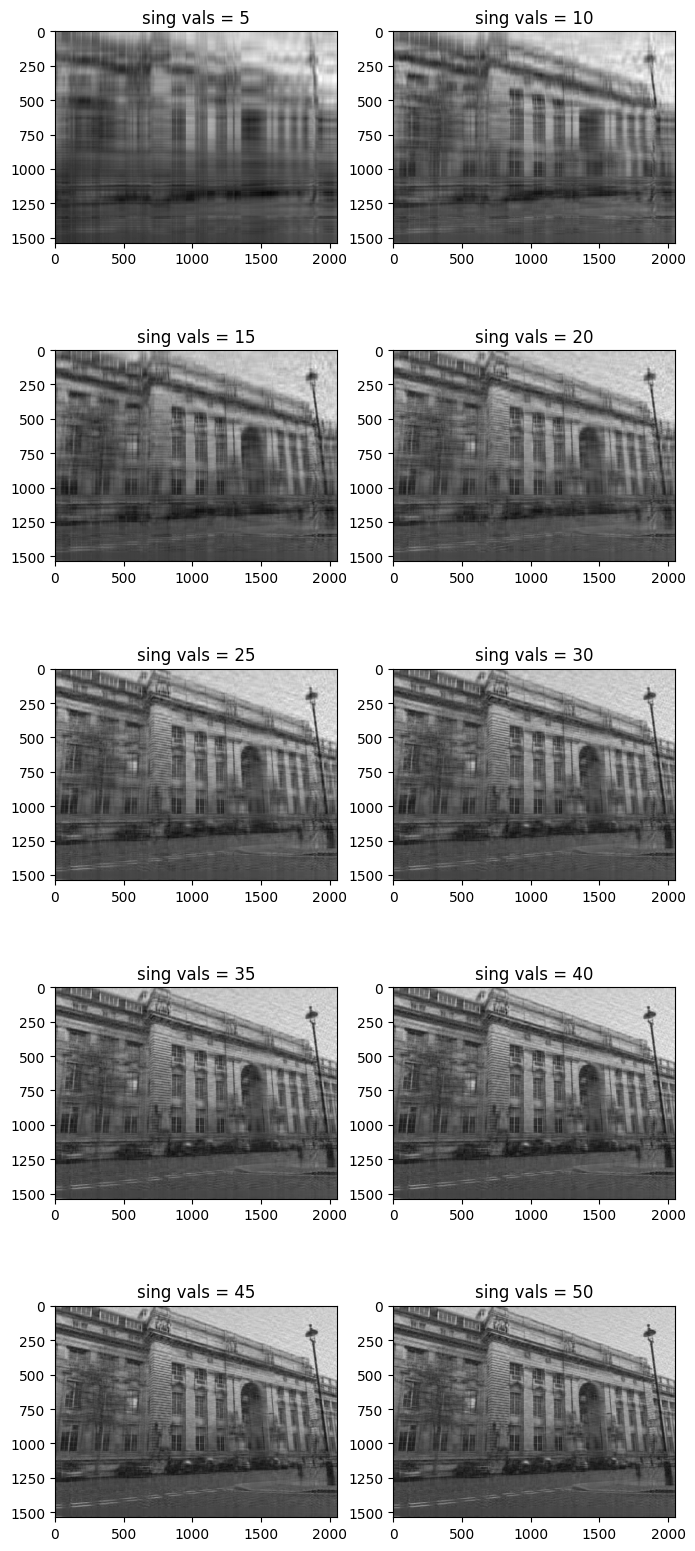

In [24]:
# increment the number of singular values by 5 instead
fig = plt.figure(figsize=(8, 20))
for i_ in range(1,11):
    i = 5*i_
    # restrict the number of singular values considered
    sigma_r = sigma[:i]
    U_r = U[:,:i]
    VT_r = VT[:i,:]
    # recpmnstruct the image
    img_r = U_r@np.diag(sigma_r)@VT_r
    ax1 = fig.add_subplot(5, 2, i_)
    ax1.imshow(img_r, cmap='gray')
    ax1.set_title('sing vals = %i' %i)